In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
%matplotlib inline

In [2]:
#df is data from black friday sales
df=pd.read_csv('train.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.shape

(550068, 12)

In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

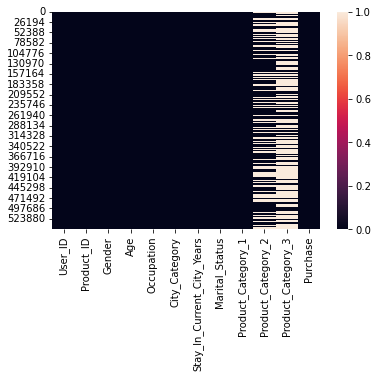

In [6]:
sns.heatmap(df.isnull())
plt.show()

In [9]:
#df=df.dropna()
#sns.heatmap(df.isnull())
#plt.show()
df.loc[df['Product_Category_2'].isnull(),'Product_Category_2']=0
df.loc[df['Product_Category_3'].isnull(),'Product_Category_3']=0

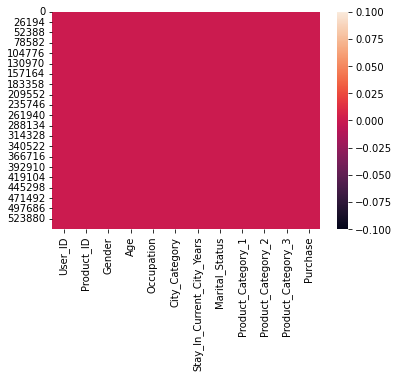

In [10]:
sns.heatmap(df.isnull())
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [12]:
df.rename(columns={'User_ID':'ID','Product_ID':'ProductID','City_Category':'CityCategory','Stay_In_Current_City_Years':'StayYears','Marital_Status':'MaritalStatus','Product_Category_1':'PCat1','Product_Category_2':'PCat2','Product_Category_3':'PCat3'}, inplace=True)
df.head(2)

,ID,ProductID,Gender,Age,Occupation,CityCategory,StayYears,MaritalStatus,PCat1,PCat2,PCat3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [13]:
df.describe()

,ID,Occupation,MaritalStatus,PCat1,PCat2,PCat3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,6.735436,3.841941,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,6.215492,6.250712,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,0.000000,0.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,5.000000,0.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [14]:
df.drop(columns=['ProductID'],inplace =True)

### Age

In [15]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [16]:
df['Age']=df['Age'].map({'0-17':'Child','18-25':'Teenage','26-35':'Adult','36-45':'Adult','46-50':'Adult','51-55':'Old','55+':'Old'})

In [17]:
df['Age'].unique()

array(['Child', 'Old', 'Adult', 'Teenage'], dtype=object)

In [19]:
df.loc[0:4,['Age','Gender','Purchase']]

,Age,Gender,Purchase
0,Child,F,8370
1,Child,F,15200
2,Child,F,1422
3,Child,F,1057
4,Old,M,7969


In [20]:
df['AgeLength']=df.Age.apply(len)

In [21]:
df.loc[0:4,['Age','AgeLength']]

,Age,AgeLength
0,Child,5
1,Child,5
2,Child,5
3,Child,5
4,Old,3


Data Visualization

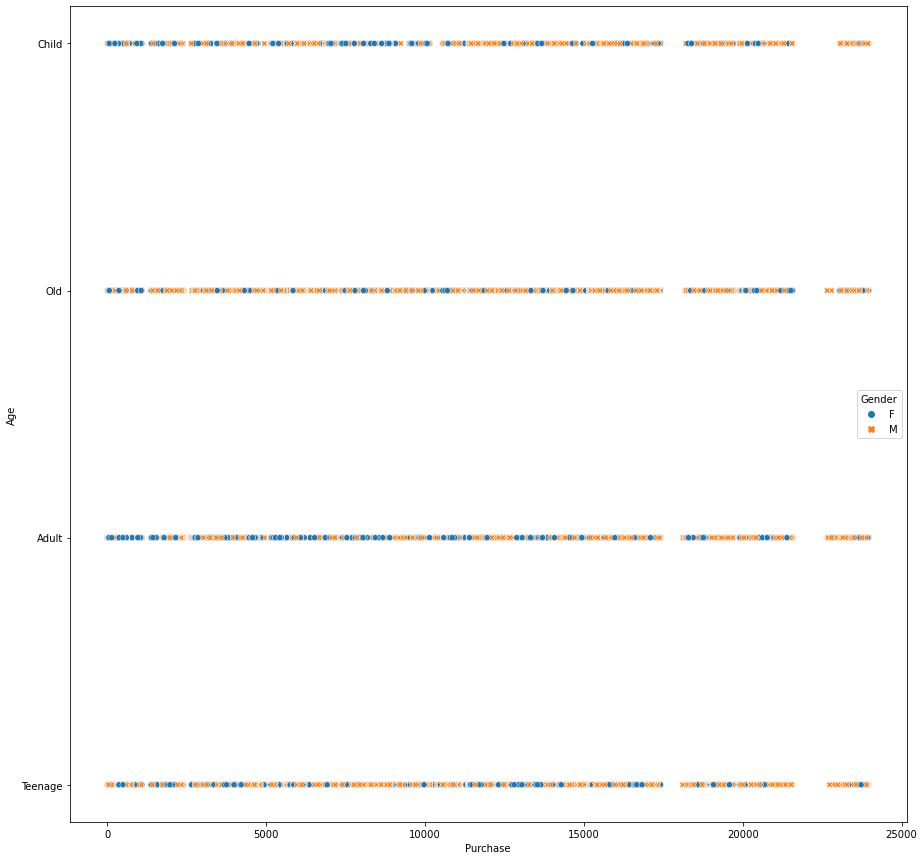

In [38]:
#matplotlib.pyplot.scatter(x_axis_data, y_axis_data, s=None, c=None, marker=None, cmap=None, vmin=None, vmax=None, alpha=None, linewidths=None, edgecolors=None) 

plt.figure(figsize=(15,15))
sns.scatterplot(data=df,x='Purchase',y='Age',marker='*',hue='Gender',style='Gender')
plt.show()

<AxesSubplot:title={'center':'Purchase vs Age'}, xlabel='Age', ylabel='Purchase'>

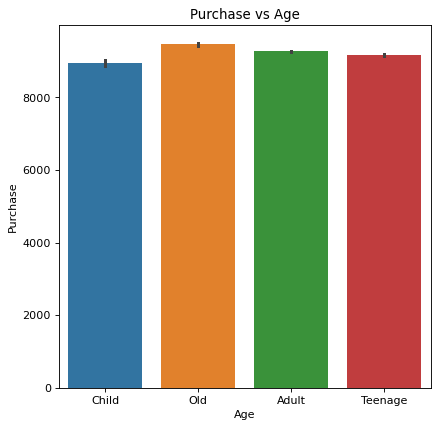

In [47]:
plt.figure(figsize=(6,6),dpi=80)
plt.title('Purchase vs Age')
sns.barplot(x='Age',y='Purchase',data=df)

C:\Users\itsas\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\itsas\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\itsas\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\itsas\Anaconda3\lib\si

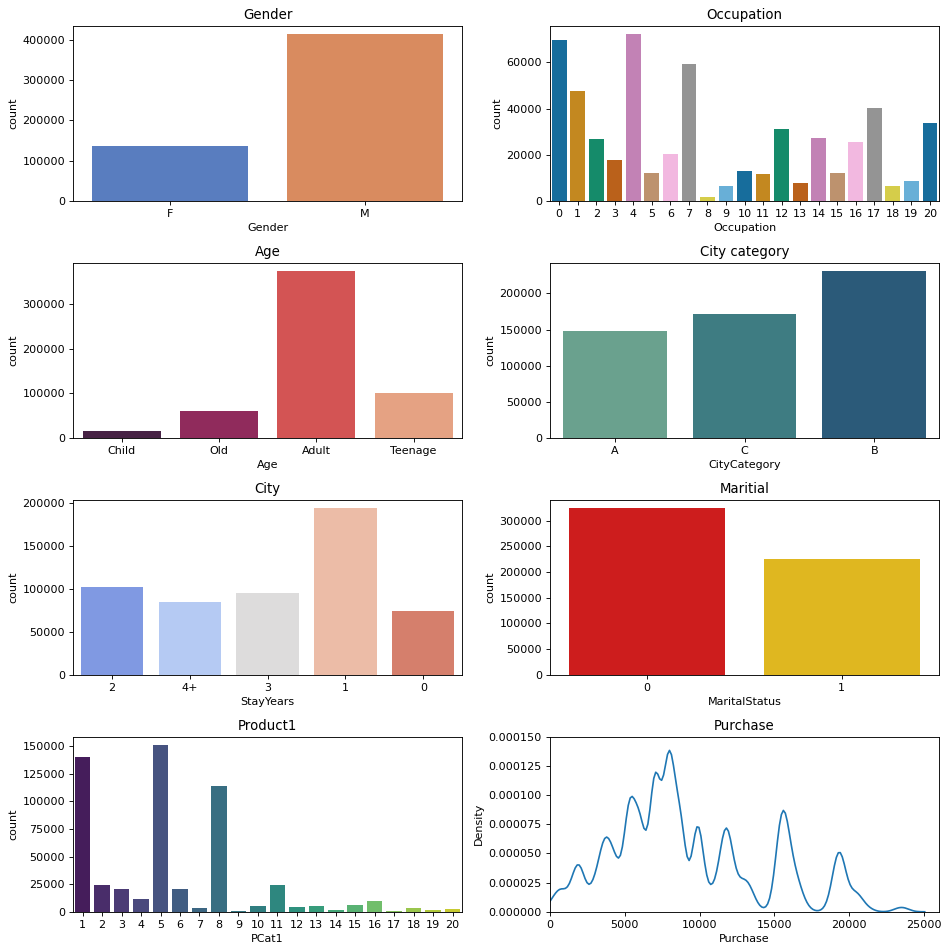

In [57]:
# Visualizing individual column 
plt.figure(figsize=(12,12),dpi=80)
plt.subplot(4,2,1)
plt.title('Gender')
sns.countplot(x='Gender',data=df,palette='muted')

plt.subplot(4,2,3)
plt.title('Age')
sns.countplot(x='Age',data=df,palette='rocket')

plt.subplot(4,2,2)
plt.title('Occupation')
sns.countplot(df['Occupation'],palette='colorblind')

plt.subplot(4,2,4)
plt.title('City category')
sns.countplot(df['CityCategory'],palette='crest')

plt.subplot(4,2,5)
plt.title('City')
sns.countplot(df['StayYears'],palette='coolwarm')

plt.subplot(4,2,6)
plt.title('Maritial')
sns.countplot(df['MaritalStatus'],palette='hot')

ax=plt.subplot(4,2,8)
plt.title('Purchase')
ax.set_ylim(0,0.00015)
ax.set_xlim(0,26000)
sns.kdeplot(df['Purchase'])

plt.subplot(4,2,7)
plt.title('Product1')
sns.countplot(df['PCat1'],palette='viridis')

plt.tight_layout()
plt.show()

In [50]:
df.columns

Index(['ID', 'Gender', 'Age', 'Occupation', 'CityCategory', 'StayYears',
       'MaritalStatus', 'PCat1', 'PCat2', 'PCat3', 'Purchase', 'AgeLength'],
      dtype='object')

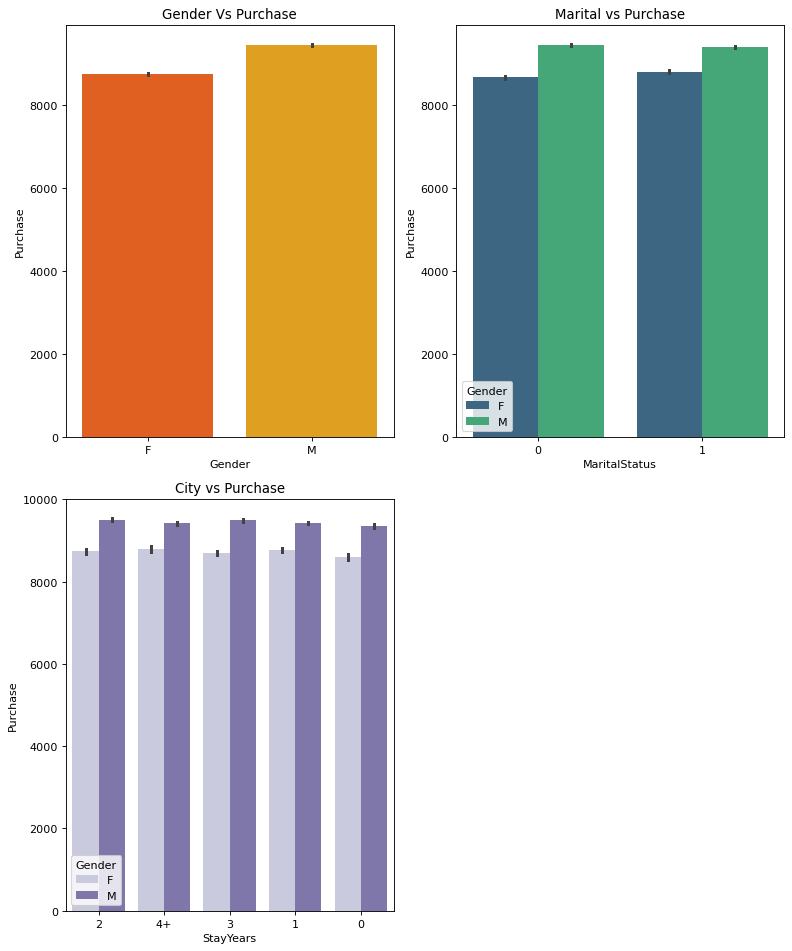

In [73]:
plt.figure(figsize=(10,12),dpi=80)

plt.subplot(2,2,1)
plt.title('Gender Vs Purchase')
sns.barplot(x='Gender',y='Purchase',data=df,palette='autumn')

plt.subplot(2,2,2)
plt.title('Marital vs Purchase')
sns.barplot(x='MaritalStatus',y='Purchase',hue='Gender',data=df,palette='viridis')

plt.subplot(2,2,3)
plt.title('City vs Purchase')
sns.barplot(x='StayYears',y='Purchase',hue='Gender',data=df,palette='Purples')

plt.tight_layout()
plt.show()

<AxesSubplot:>

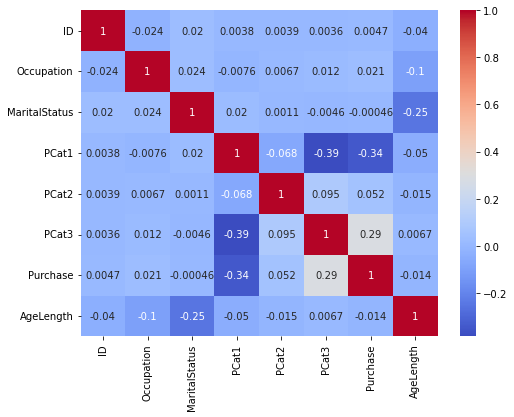

In [77]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

C:\Users\itsas\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Purchase', ylabel='Density'>

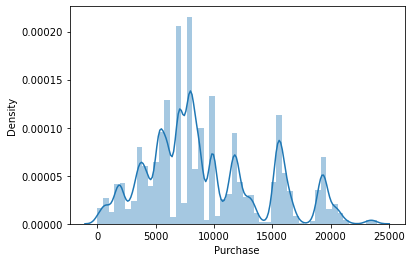

In [78]:
sns.distplot(df['Purchase'])

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [80]:
lr = LinearRegression()

In [86]:
df=df.drop('AgeLength', axis = 1)

In [87]:
df

,ID,Gender,Age,Occupation,CityCategory,StayYears,MaritalStatus,PCat1,PCat2,PCat3,Purchase
0,1000001,F,Child,10,A,2,0,3,0.0,0.0,8370
1,1000001,F,Child,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,Child,10,A,2,0,12,0.0,0.0,1422
3,1000001,F,Child,10,A,2,0,12,14.0,0.0,1057
4,1000002,M,Old,16,C,4+,0,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,M,Old,13,B,1,1,20,0.0,0.0,368
550064,1006035,F,Adult,1,C,3,0,20,0.0,0.0,371
550065,1006036,F,Adult,15,B,4+,1,20,0.0,0.0,137
550066,1006038,F,Old,1,C,2,0,20,0.0,0.0,365


In [88]:
X = df.drop('Purchase', axis=1)
y= df['Purchase']

In [90]:
X.head()

,ID,Gender,Age,Occupation,CityCategory,StayYears,MaritalStatus,PCat1,PCat2,PCat3
0,1000001,F,Child,10,A,2,0,3,0.0,0.0
1,1000001,F,Child,10,A,2,0,1,6.0,14.0
2,1000001,F,Child,10,A,2,0,12,0.0,0.0
3,1000001,F,Child,10,A,2,0,12,14.0,0.0
4,1000002,M,Old,16,C,4+,0,8,0.0,0.0


In [91]:
y

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64

In [94]:
X_train,y_train,X_test,y_test= train_test_split(X,y, train_size=0.8 )
X_train.shape, y_train.shape,X_test.shape,y_test.shape


((440054, 10), (110014, 10), (440054,), (110014,))

In [95]:
lr

LinearRegression()